In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from IPython.display import display

# Naïve Bayes models
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# KNN models
from sklearn.neighbors import KNeighborsClassifier

# SVM models
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report,
                            roc_curve, auc, roc_auc_score)


In [2]:
# 1. Loading the dataset
df = pd.read_csv("/content/spambase_csv.csv")
display(df.head())

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
# 2. Preprocessing the data

print("No of Instances : ",df.shape[0])
print()
print("No of Features : ",df.shape[1])
print()
print("Instances :")
for col in df.columns:
    print(col)
print()
print()
print("Number of instances/class : ",df.groupby("class").size())
print()

No of Instances :  4601

No of Features :  58

Instances :
word_freq_make
word_freq_address
word_freq_all
word_freq_3d
word_freq_our
word_freq_over
word_freq_remove
word_freq_internet
word_freq_order
word_freq_mail
word_freq_receive
word_freq_will
word_freq_people
word_freq_report
word_freq_addresses
word_freq_free
word_freq_business
word_freq_email
word_freq_you
word_freq_credit
word_freq_your
word_freq_font
word_freq_000
word_freq_money
word_freq_hp
word_freq_hpl
word_freq_george
word_freq_650
word_freq_lab
word_freq_labs
word_freq_telnet
word_freq_857
word_freq_data
word_freq_415
word_freq_85
word_freq_technology
word_freq_1999
word_freq_parts
word_freq_pm
word_freq_direct
word_freq_cs
word_freq_meeting
word_freq_original
word_freq_project
word_freq_re
word_freq_edu
word_freq_table
word_freq_conference
char_freq_%3B
char_freq_%28
char_freq_%5B
char_freq_%21
char_freq_%24
char_freq_%23
capital_run_length_average
capital_run_length_longest
capital_run_length_total
class


Number of in

In [4]:
print("\n--- Data Types ---")
print(df.info())


--- Data Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_rep

In [5]:
print("--- Missing Values ---")
print(df.isnull().sum())

--- Missing Values ---
word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet 

In [6]:
print(df.describe())

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.

In [7]:
# Standardization
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'class' in numeric_features:
    numeric_features.remove('class')

# Apply MinMax Scaling
minmax = MinMaxScaler()
df[numeric_features] = minmax.fit_transform(df[numeric_features])

print("--- Data after MinMax Scaling ---")
print(df.head(5))
print()
print(df.describe())
print()

--- Data after MinMax Scaling ---
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0        0.000000           0.044818       0.125490           0.0   
1        0.046256           0.019608       0.098039           0.0   
2        0.013216           0.000000       0.139216           0.0   
3        0.000000           0.000000       0.000000           0.0   
4        0.000000           0.000000       0.000000           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0          0.032        0.000000          0.000000            0.000000   
1          0.014        0.047619          0.028886            0.006301   
2          0.123        0.032313          0.026135            0.010801   
3          0.063        0.000000          0.042641            0.056706   
4          0.063        0.000000          0.042641            0.056706   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0         0.000000        0.00000

 EXPLORATORY DATA ANALYSIS

Class Distribution:
Ham (0): 2788 (60.60%)
Spam (1): 1813 (39.40%)


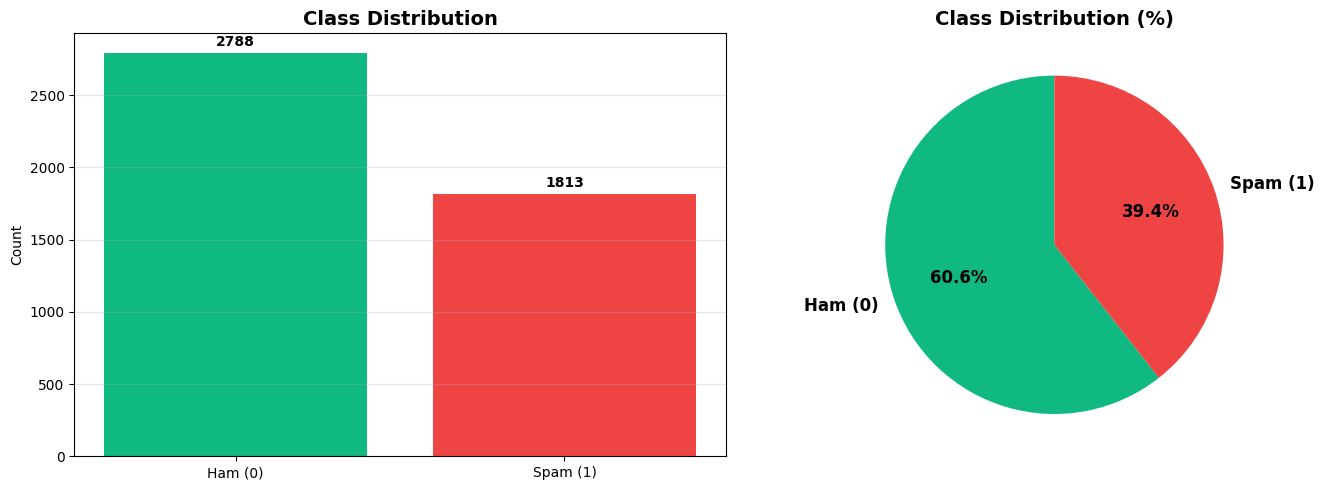

In [8]:

#  EXPLORATORY DATA ANALYSIS (EDA)


print(" EXPLORATORY DATA ANALYSIS")


# Class distribution
class_counts = df['class'].value_counts()
print("\nClass Distribution:")
print(f"Ham (0): {class_counts[0]} ({class_counts[0]/len(df)*100:.2f}%)")
print(f"Spam (1): {class_counts[1]} ({class_counts[1]/len(df)*100:.2f}%)")

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(['Ham (0)', 'Spam (1)'], class_counts.values, color=['#10b981', '#ef4444'])
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Pie chart
colors = ['#10b981', '#ef4444']
axes[1].pie(class_counts.values, labels=['Ham (0)', 'Spam (1)'], autopct='%1.1f%%',
           colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Class Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Feature distributions for top spam indicators
spam_emails = df[df['class'] == 1]
ham_emails = df[df['class'] == 0]

In [9]:
print(df.describe())

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.023029           0.014917       0.055031      0.001528   
std          0.067259           0.090376       0.098852      0.032589   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.082353      0.000000   
max          1.000000           1.000000       1.000000      1.000000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.031222        0.016310          0.015709            0.009477   
std         0.067251        0.046569          0.053843            0.036100   
min         0.000000        0.

In [10]:
X = df.drop('class',axis=1)
Y = df['class']

print(X.head)
print(Y.head)

<bound method NDFrame.head of       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0           0.000000           0.044818       0.125490           0.0   
1           0.046256           0.019608       0.098039           0.0   
2           0.013216           0.000000       0.139216           0.0   
3           0.000000           0.000000       0.000000           0.0   
4           0.000000           0.000000       0.000000           0.0   
...              ...                ...            ...           ...   
4596        0.068282           0.000000       0.121569           0.0   
4597        0.000000           0.000000       0.000000           0.0   
4598        0.066079           0.000000       0.058824           0.0   
4599        0.211454           0.000000       0.000000           0.0   
4600        0.000000           0.000000       0.127451           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0             0.032        0

In [11]:

# FEATURE SELECTION

print("\n" + "="*80)
print("STEP 2.2: FEATURE SELECTION")
print("="*80)

X = df.drop('class', axis=1)
Y = df['class']

print("Original Features:")
print(X.head())
print()
print("Target Variable:")
print(Y.head())
print()

# Feature Selection - ANOVA
selector = SelectKBest(score_func=f_classif, k=20)
X_new = selector.fit_transform(X, Y)
selected_cols = selector.get_support(indices=True)
X_df = pd.DataFrame(X_new, columns=X.columns[selected_cols])

print("Selected Features (Top 20):")
display(X_df.head(20))
print()

# Feature scores
feature_scores = selector.scores_
selected_features = X.columns[selector.get_support()]

print("ANOVA Test:\n")
print("FEATURE SCORES:")
for feat, score in zip(X.columns, feature_scores):
    print(f"  {feat}: {score:.4f}")
print()

print("Selected Features:")
print(selected_features.tolist())
print()

# Update X with selected features
X = X[selected_features]
display(X)



STEP 2.2: FEATURE SELECTION
Original Features:
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0        0.000000           0.044818       0.125490           0.0   
1        0.046256           0.019608       0.098039           0.0   
2        0.013216           0.000000       0.139216           0.0   
3        0.000000           0.000000       0.000000           0.0   
4        0.000000           0.000000       0.000000           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0          0.032        0.000000          0.000000            0.000000   
1          0.014        0.047619          0.028886            0.006301   
2          0.123        0.032313          0.026135            0.010801   
3          0.063        0.000000          0.042641            0.056706   
4          0.063        0.000000          0.042641            0.056706   

   word_freq_order  word_freq_mail  ...  word_freq_conference  char_freq_%3B  \
0         0.

,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_receive,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_your,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,char_freq_%21,char_freq_%24,capital_run_length_longest,capital_run_length_total
0,0.125490,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,0.0160,0.000000,0.141914,0.102933,0.086409,0.000000,0.0000,0.0,0.0,0.023955,0.000000,0.006007,0.017487
1,0.098039,0.014,0.047619,0.028886,0.006301,0.000000,0.080460,0.0070,0.009804,0.030803,0.185067,0.143114,0.078899,0.0344,0.0,0.0,0.011454,0.029985,0.010012,0.064836
2,0.139216,0.123,0.032313,0.026135,0.010801,0.121673,0.145594,0.0030,0.008403,0.113311,0.072533,0.045905,0.212844,0.0048,0.0,0.0,0.008498,0.030651,0.048458,0.142551
3,0.000000,0.063,0.000000,0.042641,0.056706,0.058935,0.118774,0.0155,0.000000,0.000000,0.169600,0.027903,0.000000,0.0000,0.0,0.0,0.004218,0.000000,0.003905,0.011995
4,0.000000,0.063,0.000000,0.042641,0.056706,0.058935,0.118774,0.0155,0.000000,0.000000,0.169600,0.027903,0.000000,0.0000,0.0,0.0,0.004157,0.000000,0.003905,0.011995
5,0.000000,0.185,0.000000,0.000000,0.166517,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.001402,0.003346
6,0.000000,0.192,0.000000,0.000000,0.000000,0.000000,0.367816,0.0480,0.000000,0.035204,0.205333,0.057606,0.000000,0.0000,0.0,0.0,0.005050,0.008996,0.000300,0.007008
7,0.000000,0.188,0.000000,0.000000,0.169217,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.001001,0.003030
8,0.090196,0.061,0.000000,0.041265,0.000000,0.174905,0.291188,0.0000,0.000000,0.016502,0.065600,0.180018,0.000000,0.0120,0.0,0.0,0.005573,0.033816,0.044453,0.079293
9,0.150980,0.019,0.054422,0.052270,0.000000,0.011407,0.000000,0.0000,0.000000,0.013201,0.089067,0.063906,0.034862,0.0000,0.0,0.0,0.007513,0.013493,0.004205,0.047222



ANOVA Test:

FEATURE SCORES:
  word_freq_make: 74.4402
  word_freq_address: 4.2049
  word_freq_all: 185.6654
  word_freq_3d: 15.1875
  word_freq_our: 285.8907
  word_freq_over: 263.0606
  word_freq_remove: 570.1696
  word_freq_internet: 205.4867
  word_freq_order: 260.5499
  word_freq_mail: 90.5576
  word_freq_receive: 267.6872
  word_freq_will: 0.2756
  word_freq_people: 82.7238
  word_freq_report: 16.6314
  word_freq_addresses: 183.5434
  word_freq_free: 342.3462
  word_freq_business: 342.3163
  word_freq_email: 200.1283
  word_freq_you: 372.2740
  word_freq_credit: 171.7929
  word_freq_your: 791.7260
  word_freq_font: 39.1379
  word_freq_000: 580.5345
  word_freq_money: 225.3146
  word_freq_hp: 324.4908
  word_freq_hpl: 263.9304
  word_freq_george: 160.0814
  word_freq_650: 118.9756
  word_freq_lab: 83.4813
  word_freq_labs: 138.6880
  word_freq_telnet: 75.2873
  word_freq_857: 60.7862
  word_freq_data: 67.1148
  word_freq_415: 59.2223
  word_freq_85: 104.7437
  word_freq_technolog

,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_receive,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_your,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,char_freq_%21,char_freq_%24,capital_run_length_longest,capital_run_length_total
0,0.125490,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,0.0160,0.000000,0.141914,0.102933,0.086409,0.000000,0.0000,0.0,0.0,0.023955,0.000000,0.006007,0.017487
1,0.098039,0.014,0.047619,0.028886,0.006301,0.000000,0.080460,0.0070,0.009804,0.030803,0.185067,0.143114,0.078899,0.0344,0.0,0.0,0.011454,0.029985,0.010012,0.064836
2,0.139216,0.123,0.032313,0.026135,0.010801,0.121673,0.145594,0.0030,0.008403,0.113311,0.072533,0.045905,0.212844,0.0048,0.0,0.0,0.008498,0.030651,0.048458,0.142551
3,0.000000,0.063,0.000000,0.042641,0.056706,0.058935,0.118774,0.0155,0.000000,0.000000,0.169600,0.027903,0.000000,0.0000,0.0,0.0,0.004218,0.000000,0.003905,0.011995
4,0.000000,0.063,0.000000,0.042641,0.056706,0.058935,0.118774,0.0155,0.000000,0.000000,0.169600,0.027903,0.000000,0.0000,0.0,0.0,0.004157,0.000000,0.003905,0.011995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.121569,0.000,0.052721,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.033067,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.000200,0.005492
4597,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.320000,0.180018,0.000000,0.0000,0.0,0.0,0.010869,0.000000,0.000300,0.000821
4598,0.058824,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.099010,0.080000,0.027003,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.000501,0.007386
4599,0.000000,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.102933,0.028803,0.000000,0.0000,0.0,0.0,0.000000,0.000000,0.000400,0.004861


In [12]:
X = X[selected_features]

In [13]:
# SPLITTING THE DATA

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

print(f"Train set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Train class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Data preprocessing completed!")


Train set size: 3220 samples
Test set size: 1381 samples
Train class distribution: [1951 1269]
Test class distribution: [837 544]

✓ Data preprocessing completed!


In [14]:
#  MODEL TRAINING AND EVALUATION
print(" MODEL TRAINING AND EVALUATION")

# Dictionary to store all results
results = {}

def evaluate_model(name, model, X_train_data, X_test_data, y_train, y_test):
    """Train and evaluate model"""
    # Train
    model.fit(X_train_data, y_train)

    # Predict
    y_pred = model.predict(X_test_data)

    # Get probabilities if available
    try:
        y_pred_proba = model.predict_proba(X_test_data)[:, 1]
    except:
        y_pred_proba = None

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results[name] = {
        'model': model,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'confusion_matrix': cm,
        'predictions': y_pred,
        'pred_proba': y_pred_proba
    }

    # Print results
    print(f"\n{name}")
    print("-" * 70)
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    return model, y_pred


 MODEL TRAINING AND EVALUATION


In [15]:
#  NAÏVE BAYES MODELS
print(" NAÏVE BAYES MODELS")

# Gaussian Naïve Bayes
print("\n Training Gaussian Naïve Bayes...")
gnb_model = GaussianNB()
gnb_model, gnb_pred = evaluate_model('Gaussian NB', gnb_model, X_train, X_test, y_train, y_test)

# Multinomial Naïve Bayes
print("\n Training Multinomial Naïve Bayes...")
mnb_model = MultinomialNB()
mnb_model, mnb_pred = evaluate_model('Multinomial NB', mnb_model, X_train, X_test, y_train, y_test)

# Bernoulli Naïve Bayes
print("\n Training Bernoulli Naïve Bayes...")
bnb_model = BernoulliNB()
bnb_model, bnb_pred = evaluate_model('Bernoulli NB', bnb_model, X_train, X_test, y_train, y_test)


 NAÏVE BAYES MODELS

 Training Gaussian Naïve Bayes...

Gaussian NB
----------------------------------------------------------------------
Accuracy:  0.8639
Precision: 0.8886
Recall:    0.7482
F1-Score:  0.8124
Confusion Matrix:
[[786  51]
 [137 407]]

 Training Multinomial Naïve Bayes...

Multinomial NB
----------------------------------------------------------------------
Accuracy:  0.7306
Precision: 0.9943
Recall:    0.3180
F1-Score:  0.4819
Confusion Matrix:
[[836   1]
 [371 173]]

 Training Bernoulli Naïve Bayes...

Bernoulli NB
----------------------------------------------------------------------
Accuracy:  0.8718
Precision: 0.8605
Recall:    0.8051
F1-Score:  0.8319
Confusion Matrix:
[[766  71]
 [106 438]]


In [16]:
#  K-NEAREST NEIGHBORS (KNN)
print("K-NEAREST NEIGHBORS (KNN)")

# Test different K values
k_values = [3, 5, 7, 9, 11]

for k in k_values:
    print(f"\n[KNN with k={k}] Training...")
    knn_model = KNeighborsClassifier(n_neighbors=k, algorithm='auto')
    knn_model, knn_pred = evaluate_model(f'KNN (k={k})', knn_model, X_train_scaled, X_test_scaled, y_train, y_test)

# Test different algorithms with k=5
print("\n" + "-"*70)
print("Testing different KNN algorithms (k=5):")
print("-"*70)

algorithms = ['auto', 'ball_tree', 'kd_tree']

for algo in algorithms:
    print(f"\n[KNN - {algo}] Training...")
    knn_model = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    knn_model, knn_pred = evaluate_model(f'KNN ({algo})', knn_model, X_train_scaled, X_test_scaled, y_train, y_test)



K-NEAREST NEIGHBORS (KNN)

[KNN with k=3] Training...

KNN (k=3)
----------------------------------------------------------------------
Accuracy:  0.8950
Precision: 0.9014
Recall:    0.8235
F1-Score:  0.8607
Confusion Matrix:
[[788  49]
 [ 96 448]]

[KNN with k=5] Training...

KNN (k=5)
----------------------------------------------------------------------
Accuracy:  0.8899
Precision: 0.9033
Recall:    0.8070
F1-Score:  0.8524
Confusion Matrix:
[[790  47]
 [105 439]]

[KNN with k=7] Training...

KNN (k=7)
----------------------------------------------------------------------
Accuracy:  0.8841
Precision: 0.9000
Recall:    0.7941
F1-Score:  0.8438
Confusion Matrix:
[[789  48]
 [112 432]]

[KNN with k=9] Training...

KNN (k=9)
----------------------------------------------------------------------
Accuracy:  0.8878
Precision: 0.9095
Recall:    0.7941
F1-Score:  0.8479
Confusion Matrix:
[[794  43]
 [112 432]]

[KNN with k=11] Training...

KNN (k=11)
-----------------------------------------

In [17]:
#  SUPPORT VECTOR MACHINE (SVM)

print("SUPPORT VECTOR MACHINE (SVM)")

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    print(f"\n[SVM - {kernel} kernel] Training...")
    if kernel == 'poly':
        svm_model = SVC(kernel=kernel, degree=3, probability=True, random_state=42)
    else:
        svm_model = SVC(kernel=kernel, probability=True, random_state=42)

    svm_model, svm_pred = evaluate_model(f'SVM ({kernel})', svm_model, X_train_scaled, X_test_scaled, y_train, y_test)



SUPPORT VECTOR MACHINE (SVM)

[SVM - linear kernel] Training...

SVM (linear)
----------------------------------------------------------------------
Accuracy:  0.9102
Precision: 0.9268
Recall:    0.8382
F1-Score:  0.8803
Confusion Matrix:
[[801  36]
 [ 88 456]]

[SVM - poly kernel] Training...

SVM (poly)
----------------------------------------------------------------------
Accuracy:  0.8327
Precision: 0.9563
Recall:    0.6029
F1-Score:  0.7396
Confusion Matrix:
[[822  15]
 [216 328]]

[SVM - rbf kernel] Training...

SVM (rbf)
----------------------------------------------------------------------
Accuracy:  0.9203
Precision: 0.9157
Recall:    0.8787
F1-Score:  0.8968
Confusion Matrix:
[[793  44]
 [ 66 478]]

[SVM - sigmoid kernel] Training...

SVM (sigmoid)
----------------------------------------------------------------------
Accuracy:  0.8045
Precision: 0.7605
Recall:    0.7353
F1-Score:  0.7477
Confusion Matrix:
[[711 126]
 [144 400]]


CONFUSION MATRICES


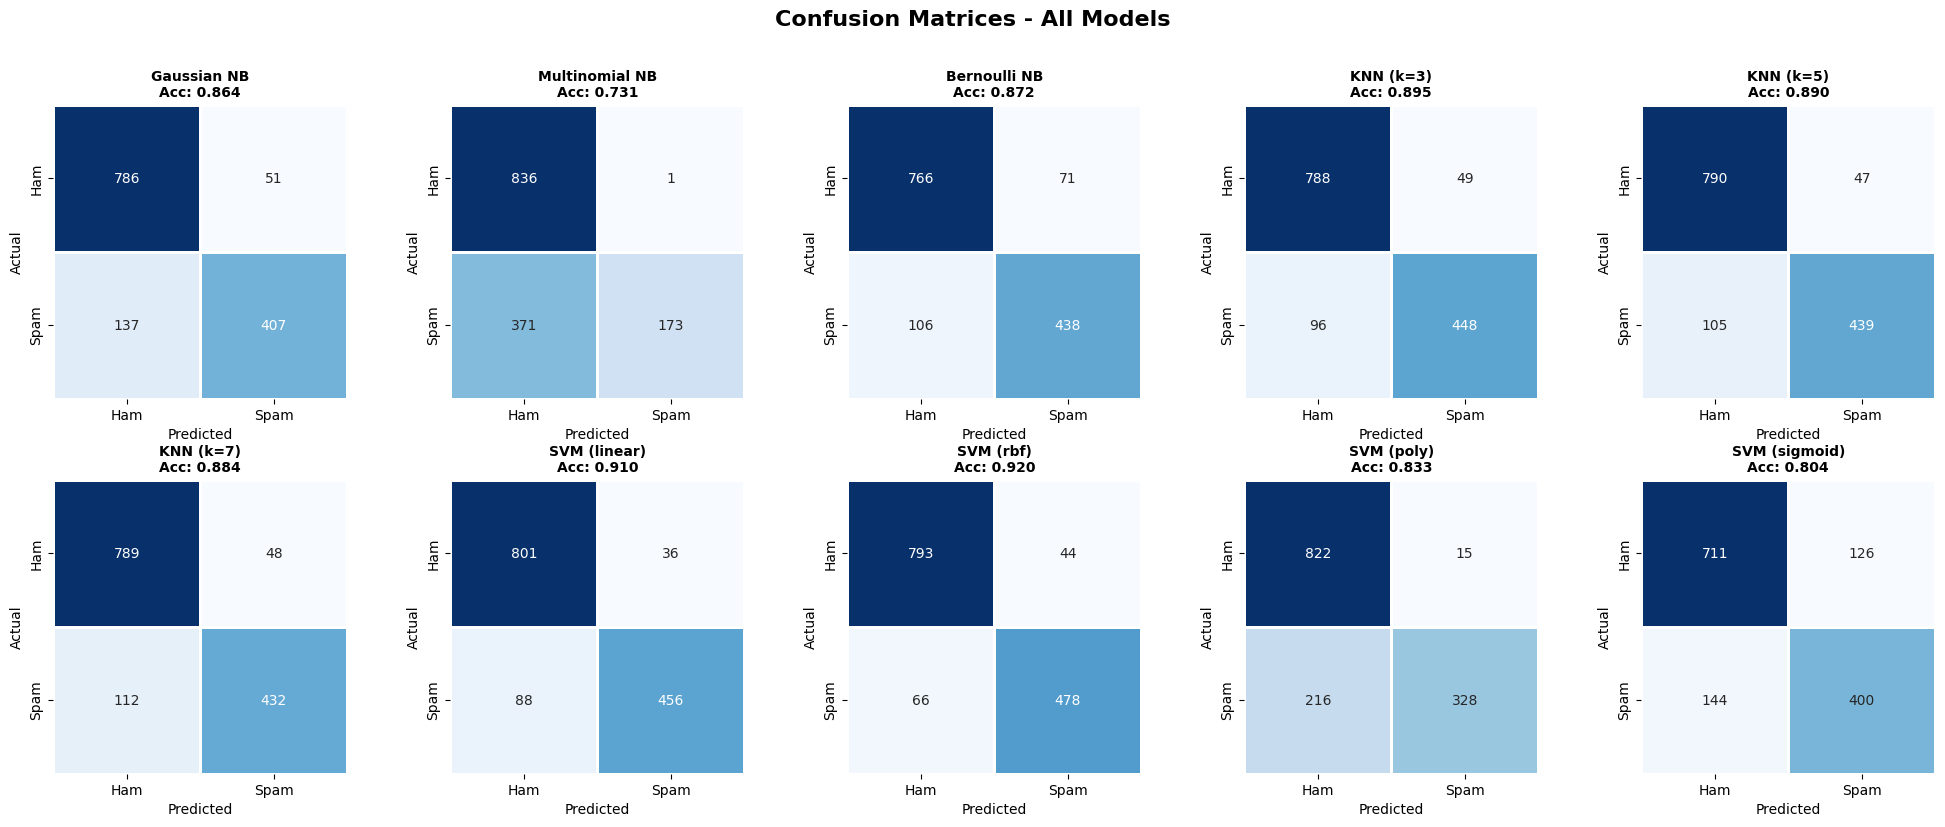

In [18]:
#  CONFUSION MATRICES VISUALIZATION
print("CONFUSION MATRICES")


#  key models for visualization
key_models = [
    'Gaussian NB', 'Multinomial NB', 'Bernoulli NB',
    'KNN (k=3)', 'KNN (k=5)', 'KNN (k=7)',
    'SVM (linear)', 'SVM (rbf)', 'SVM (poly)', 'SVM (sigmoid)'
]

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for idx, model_name in enumerate(key_models):
    if model_name in results:
        cm = results[model_name]['confusion_matrix']
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                   cbar=False, square=True, linewidths=1,
                   xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
        axes[idx].set_title(f'{model_name}\nAcc: {results[model_name]["accuracy"]:.3f}',
                           fontweight='bold', fontsize=10)
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('Actual')

plt.suptitle('Confusion Matrices - All Models', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()




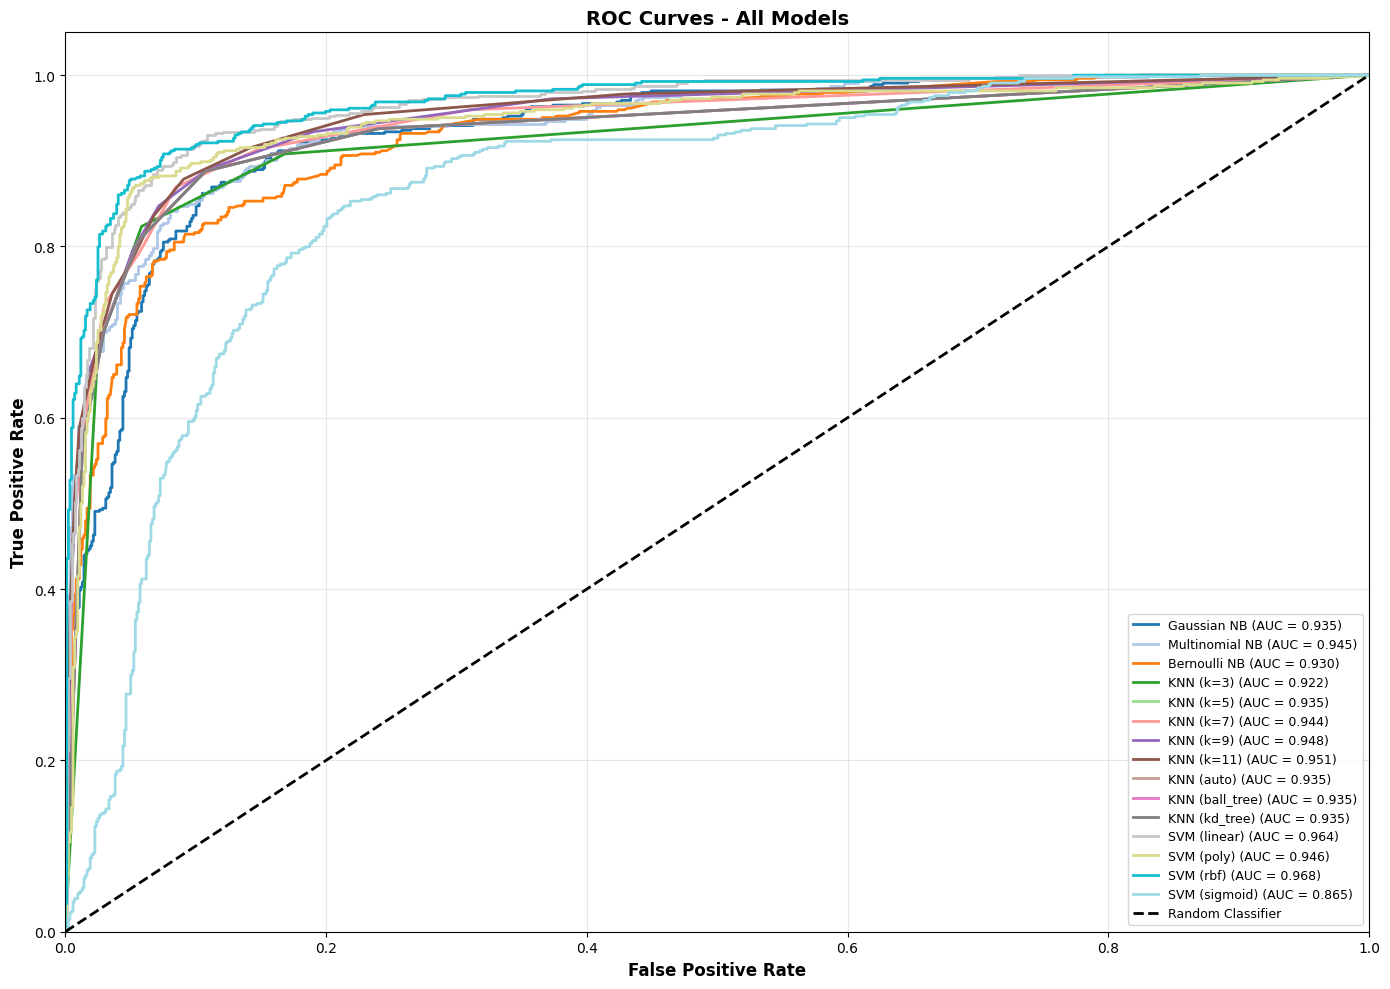

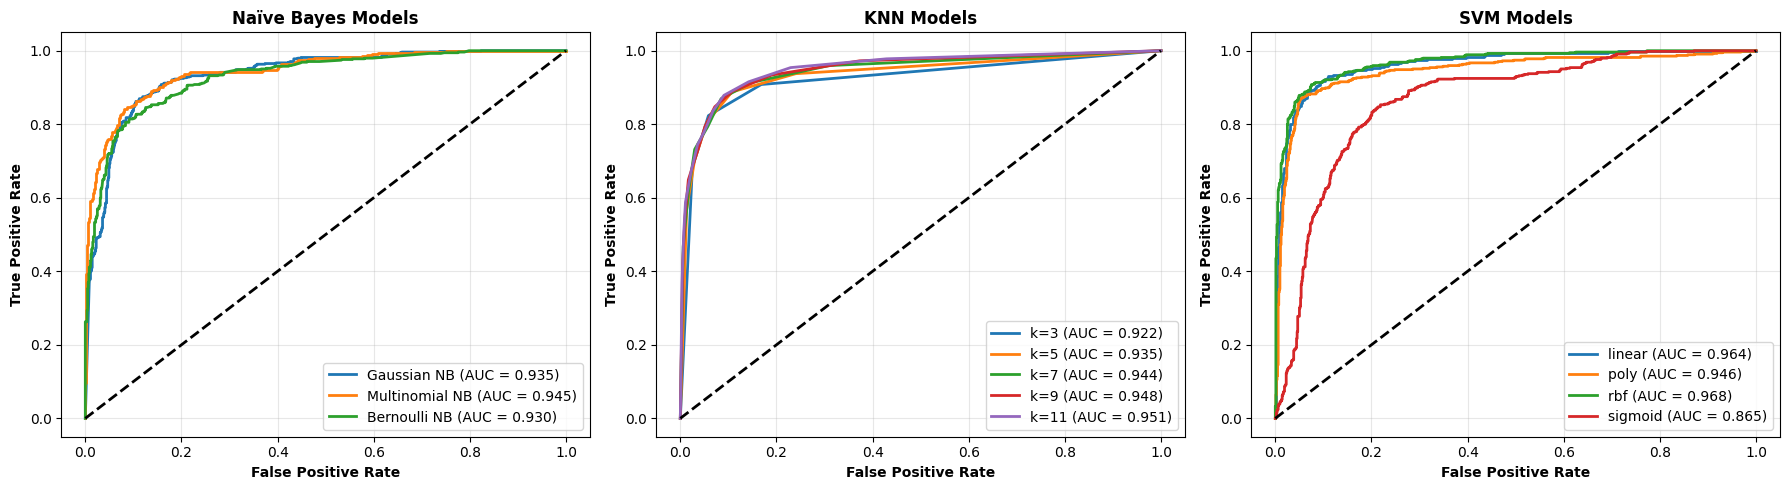

In [19]:
#  ROC CURVES

# Plot ROC curves for all models
plt.figure(figsize=(14, 10))

colors = plt.cm.tab20(np.linspace(0, 1, len(results)))

for idx, (model_name, result) in enumerate(results.items()):
    if result['pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['pred_proba'])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})',
                linewidth=2, color=colors[idx])

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=9)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Separate ROC curves by model type
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Naïve Bayes
for model_name in ['Gaussian NB', 'Multinomial NB', 'Bernoulli NB']:
    if model_name in results and results[model_name]['pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, results[model_name]['pred_proba'])
        roc_auc = auc(fpr, tpr)
        axes[0].plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})', linewidth=2)

axes[0].plot([0, 1], [0, 1], 'k--', linewidth=2)
axes[0].set_xlabel('False Positive Rate', fontweight='bold')
axes[0].set_ylabel('True Positive Rate', fontweight='bold')
axes[0].set_title('Naïve Bayes Models', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# KNN
for k in [3, 5, 7, 9, 11]:
    model_name = f'KNN (k={k})'
    if model_name in results and results[model_name]['pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, results[model_name]['pred_proba'])
        roc_auc = auc(fpr, tpr)
        axes[1].plot(fpr, tpr, label=f'k={k} (AUC = {roc_auc:.3f})', linewidth=2)

axes[1].plot([0, 1], [0, 1], 'k--', linewidth=2)
axes[1].set_xlabel('False Positive Rate', fontweight='bold')
axes[1].set_ylabel('True Positive Rate', fontweight='bold')
axes[1].set_title('KNN Models', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# SVM
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model_name = f'SVM ({kernel})'
    if model_name in results and results[model_name]['pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, results[model_name]['pred_proba'])
        roc_auc = auc(fpr, tpr)
        axes[2].plot(fpr, tpr, label=f'{kernel} (AUC = {roc_auc:.3f})', linewidth=2)

axes[2].plot([0, 1], [0, 1], 'k--', linewidth=2)
axes[2].set_xlabel('False Positive Rate', fontweight='bold')
axes[2].set_ylabel('True Positive Rate', fontweight='bold')
axes[2].set_title('SVM Models', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

 K-FOLD CROSS VALIDATION (K=5)

Naïve Bayes Models:
----------------------------------------------------------------------
Gaussian NB          - Mean: 0.8615 (+/- 0.0143)
                       Fold Scores: ['0.8804', '0.8540', '0.8385', '0.8649', '0.8696']
Multinomial NB       - Mean: 0.7280 (+/- 0.0247)
                       Fold Scores: ['0.7438', '0.7034', '0.6941', '0.7407', '0.7578']
Bernoulli NB         - Mean: 0.8674 (+/- 0.0110)
                       Fold Scores: ['0.8742', '0.8525', '0.8556', '0.8758', '0.8789']

KNN Models:
----------------------------------------------------------------------
KNN (k=3)            - Mean: 0.8944 (+/- 0.0102)
                       Fold Scores: ['0.9099', '0.8898', '0.8882', '0.8820', '0.9022']
KNN (k=5)            - Mean: 0.8922 (+/- 0.0107)
                       Fold Scores: ['0.9053', '0.9006', '0.8913', '0.8742', '0.8898']
KNN (k=7)            - Mean: 0.8885 (+/- 0.0095)
                       Fold Scores: ['0.9037', '0.8929', '0.8820

/tmp/ipython-input-2100493637.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = axes[0].boxplot(nb_scores, labels=nb_models, patch_artist=True)
/tmp/ipython-input-2100493637.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = axes[1].boxplot(knn_scores, labels=[f'k={k}' for k in [3, 5, 7, 9, 11]],
/tmp/ipython-input-2100493637.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp3 = axes[2].boxplot(svm_scores, labels=['linear', 'rbf', 'poly', 'sigmoid'],


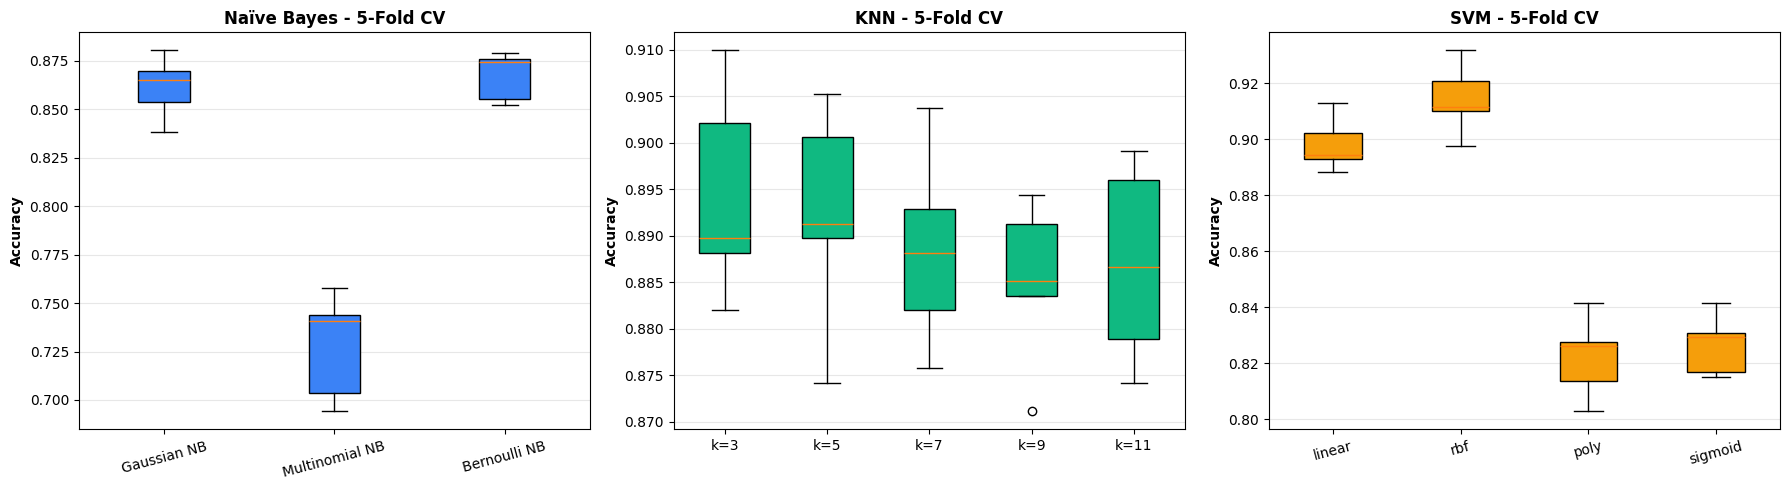

In [20]:
#  K-FOLD CROSS VALIDATION (K=5)

print(" K-FOLD CROSS VALIDATION (K=5)")

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

# Naïve Bayes
print("\nNaïve Bayes Models:")
print("-" * 70)
for name, model_class in [('Gaussian NB', GaussianNB()),
                          ('Multinomial NB', MultinomialNB()),
                          ('Bernoulli NB', BernoulliNB())]:
    scores = cross_val_score(model_class, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name:20s} - Mean: {scores.mean():.4f} (+/- {scores.std():.4f})")
    print(f"{'':20s}   Fold Scores: {[f'{s:.4f}' for s in scores]}")

# KNN
print("\nKNN Models:")
print("-" * 70)
for k in [3, 5, 7, 9, 11]:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    name = f'KNN (k={k})'
    cv_results[name] = scores
    print(f"{name:20s} - Mean: {scores.mean():.4f} (+/- {scores.std():.4f})")
    print(f"{'':20s}   Fold Scores: {[f'{s:.4f}' for s in scores]}")

# SVM
print("\nSVM Models:")
print("-" * 70)
for kernel in ['linear', 'rbf', 'poly', 'sigmoid']:
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=3, random_state=42)
    else:
        model = SVC(kernel=kernel, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    name = f'SVM ({kernel})'
    cv_results[name] = scores
    print(f"{name:20s} - Mean: {scores.mean():.4f} (+/- {scores.std():.4f})")
    print(f"{'':20s}   Fold Scores: {[f'{s:.4f}' for s in scores]}")

# Visualize cross-validation results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Naïve Bayes
nb_models = ['Gaussian NB', 'Multinomial NB', 'Bernoulli NB']
nb_scores = [cv_results[m] for m in nb_models]
bp1 = axes[0].boxplot(nb_scores, labels=nb_models, patch_artist=True)
for patch in bp1['boxes']:
    patch.set_facecolor('#3b82f6')
axes[0].set_title('Naïve Bayes - 5-Fold CV', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=15)

# KNN
knn_models = [f'KNN (k={k})' for k in [3, 5, 7, 9, 11]]
knn_scores = [cv_results[m] for m in knn_models]
bp2 = axes[1].boxplot(knn_scores, labels=[f'k={k}' for k in [3, 5, 7, 9, 11]],
                       patch_artist=True)
for patch in bp2['boxes']:
    patch.set_facecolor('#10b981')
axes[1].set_title('KNN - 5-Fold CV', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# SVM
svm_models = [f'SVM ({k})' for k in ['linear', 'rbf', 'poly', 'sigmoid']]
svm_scores = [cv_results[m] for m in svm_models]
bp3 = axes[2].boxplot(svm_scores, labels=['linear', 'rbf', 'poly', 'sigmoid'],
                       patch_artist=True)
for patch in bp3['boxes']:
    patch.set_facecolor('#f59e0b')
axes[2].set_title('SVM - 5-Fold CV', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Accuracy', fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)
axes[2].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()



Test Set Performance (sorted by F1-Score):
          Model  Accuracy  Precision   Recall  F1-Score
      SVM (rbf)  0.920348   0.915709 0.878676  0.896811
   SVM (linear)  0.910210   0.926829 0.838235  0.880309
      KNN (k=3)  0.895004   0.901408 0.823529  0.860711
KNN (ball_tree)  0.889935   0.903292 0.806985  0.852427
     KNN (auto)  0.889935   0.903292 0.806985  0.852427
      KNN (k=5)  0.889935   0.903292 0.806985  0.852427
  KNN (kd_tree)  0.889935   0.903292 0.806985  0.852427
      KNN (k=9)  0.887762   0.909474 0.794118  0.847890
      KNN (k=7)  0.884142   0.900000 0.794118  0.843750
     KNN (k=11)  0.882694   0.911638 0.777574  0.839286
   Bernoulli NB  0.871832   0.860511 0.805147  0.831909
    Gaussian NB  0.863867   0.888646 0.748162  0.812375
  SVM (sigmoid)  0.804490   0.760456 0.735294  0.747664
     SVM (poly)  0.832730   0.956268 0.602941  0.739572
 Multinomial NB  0.730630   0.994253 0.318015  0.481894


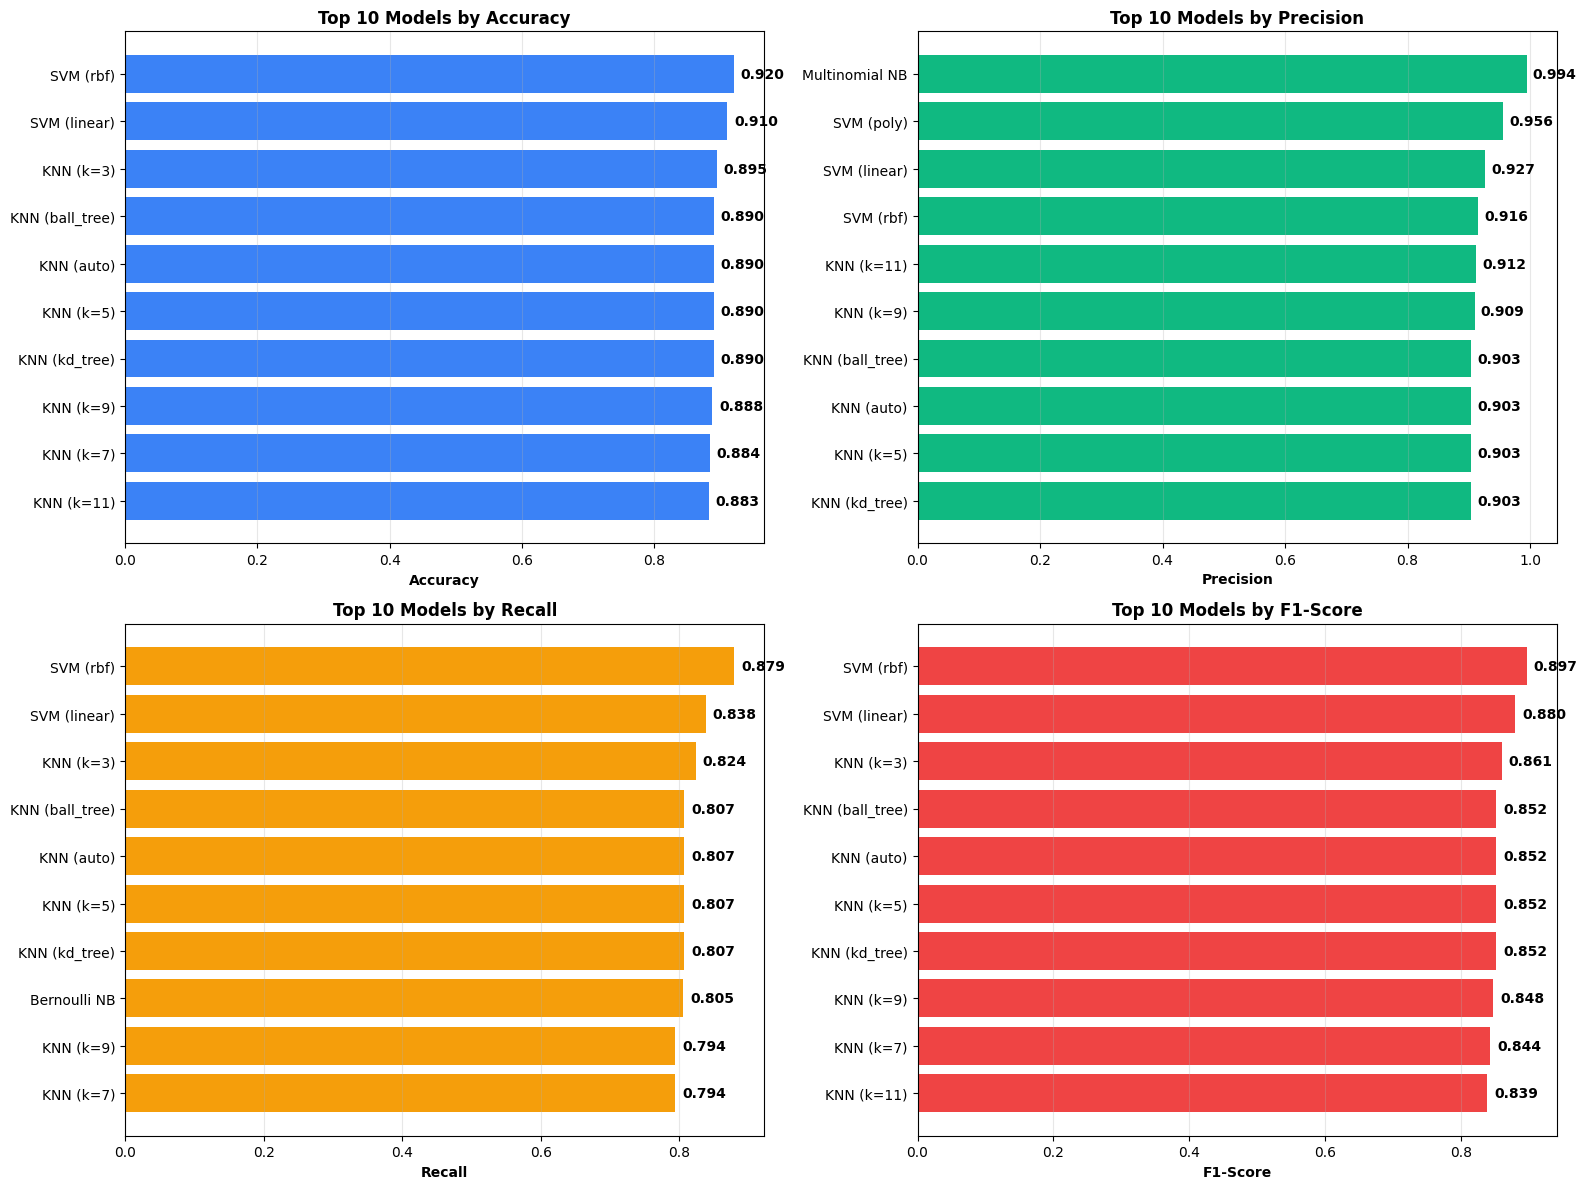


Average Performance by Model Type:
 Model Type  Accuracy  Precision   Recall  F1-Score
Naïve Bayes  0.822110   0.914470 0.623775  0.708726
        KNN  0.887907   0.905162 0.799265  0.848813
        SVM  0.866944   0.889816 0.763787  0.816089


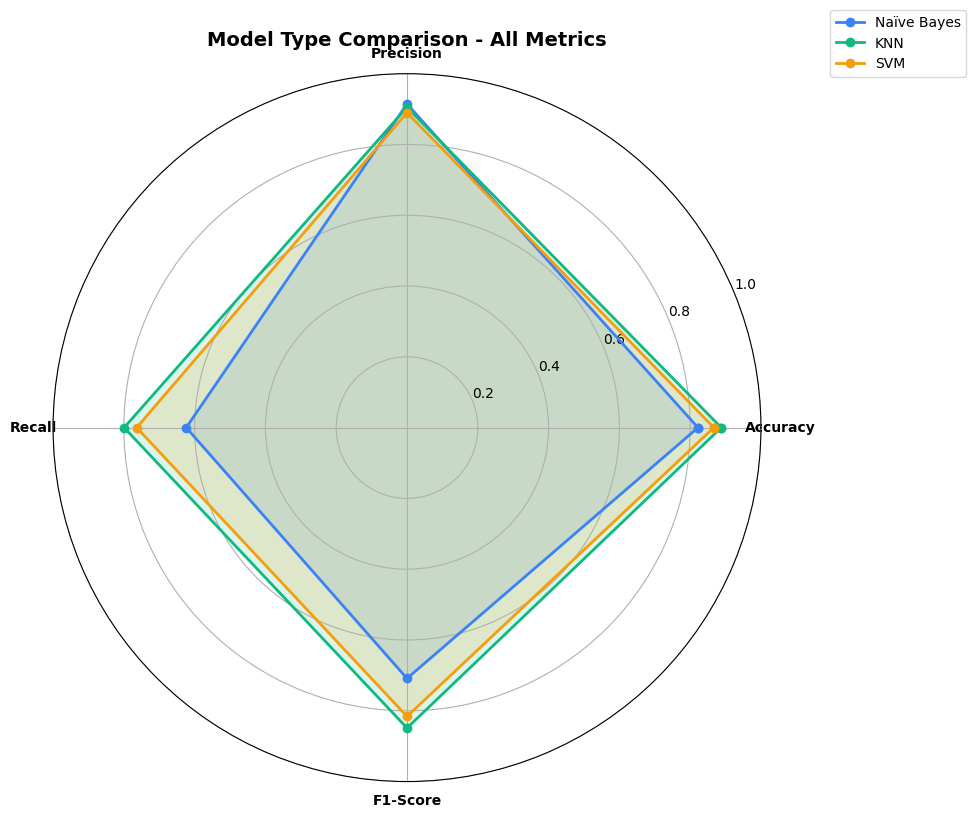

In [21]:

# COMPREHENSIVE MODEL COMPARISON

# Create comparison dataframe
comparison_data = []
for model_name, result in results.items():
    comparison_data.append({
        'Model': model_name,
        'Accuracy': result['accuracy'],
        'Precision': result['precision'],
        'Recall': result['recall'],
        'F1-Score': result['f1_score']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('F1-Score', ascending=False)

print("\nTest Set Performance (sorted by F1-Score):")
print("=" * 80)
print(comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors_map = {'Accuracy': '#3b82f6', 'Precision': '#10b981',
              'Recall': '#f59e0b', 'F1-Score': '#ef4444'}

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    top_10 = comparison_df.nlargest(10, metric)

    bars = ax.barh(range(len(top_10)), top_10[metric].values, color=colors_map[metric])
    ax.set_yticks(range(len(top_10)))
    ax.set_yticklabels(top_10['Model'].values)
    ax.set_xlabel(metric, fontweight='bold')
    ax.set_title(f'Top 10 Models by {metric}', fontsize=12, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    ax.invert_yaxis()

    # Add value labels
    for i, (bar, val) in enumerate(zip(bars, top_10[metric].values)):
        ax.text(val + 0.01, i, f'{val:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Model type comparison
model_types = {
    'Naïve Bayes': [m for m in results.keys() if 'NB' in m],
    'KNN': [m for m in results.keys() if 'KNN' in m and 'k=' in m],
    'SVM': [m for m in results.keys() if 'SVM' in m]
}

type_comparison = []
for model_type, models in model_types.items():
    if models:
        type_metrics = {
            'Accuracy': np.mean([results[m]['accuracy'] for m in models]),
            'Precision': np.mean([results[m]['precision'] for m in models]),
            'Recall': np.mean([results[m]['recall'] for m in models]),
            'F1-Score': np.mean([results[m]['f1_score'] for m in models])
        }
        type_comparison.append({'Model Type': model_type, **type_metrics})

type_df = pd.DataFrame(type_comparison)

print("\n" + "=" * 80)
print("Average Performance by Model Type:")
print("=" * 80)
print(type_df.to_string(index=False))

# Radar chart for model type comparison
from math import pi

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

colors_radar = ['#3b82f6', '#10b981', '#f59e0b']

for idx, row in type_df.iterrows():
    values = [row[m] for m in metrics]
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=row['Model Type'], color=colors_radar[idx])
    ax.fill(angles, values, alpha=0.15, color=colors_radar[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontweight='bold')
ax.set_ylim(0, 1)
ax.set_title('Model Type Comparison - All Metrics', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.show()


In [22]:

#  FINAL OBSERVATIONS AND RECOMMENDATIONS

best_model = comparison_df.iloc[0]
print(f"\n BEST OVERALL MODEL: {best_model['Model']}")
print("-" * 80)
print(f"   Accuracy:  {best_model['Accuracy']:.4f}")
print(f"   Precision: {best_model['Precision']:.4f}")
print(f"   Recall:    {best_model['Recall']:.4f}")
print(f"   F1-Score:  {best_model['F1-Score']:.4f}")

print("\n KEY OBSERVATIONS:")
print("-" * 80)

# Best in each category
for metric in metrics:
    best = comparison_df.nlargest(1, metric).iloc[0]
    print(f"   Best {metric:12s}: {best['Model']:25s} ({best[metric]:.4f})")




 BEST OVERALL MODEL: SVM (rbf)
--------------------------------------------------------------------------------
   Accuracy:  0.9203
   Precision: 0.9157
   Recall:    0.8787
   F1-Score:  0.8968

 KEY OBSERVATIONS:
--------------------------------------------------------------------------------
   Best Accuracy    : SVM (rbf)                 (0.9203)
   Best Precision   : Multinomial NB            (0.9943)
   Best Recall      : SVM (rbf)                 (0.8787)
   Best F1-Score    : SVM (rbf)                 (0.8968)


In [23]:

# ---------- Table 1: Naïve Bayes Variant Comparison ----------
nb_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Gaussian NB': [
        results['Gaussian NB']['accuracy'],
        results['Gaussian NB']['precision'],
        results['Gaussian NB']['recall'],
        results['Gaussian NB']['f1_score']
    ],
    'Multinomial NB': [
        results['Multinomial NB']['accuracy'],
        results['Multinomial NB']['precision'],
        results['Multinomial NB']['recall'],
        results['Multinomial NB']['f1_score']
    ],
    'Bernoulli NB': [
        results['Bernoulli NB']['accuracy'],
        results['Bernoulli NB']['precision'],
        results['Bernoulli NB']['recall'],
        results['Bernoulli NB']['f1_score']
    ]
})

display(nb_table.round(4))


# ---------- Table 2: KNN – Varying K Values ----------
k_values = [3, 5, 7, 9]   # only trained K values

knn_k_df = pd.DataFrame([
    [k,
     results[f'KNN (k={k})']['accuracy'],
     results[f'KNN (k={k})']['precision'],
     results[f'KNN (k={k})']['recall'],
     results[f'KNN (k={k})']['f1_score']]
    for k in k_values
], columns=['k', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

display(knn_k_df.round(4))


# ---------- Table 3: KNN – KDTree vs BallTree ----------
knn_tree_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'KDTree': [
        results['KNN (kd_tree)']['accuracy'],
        results['KNN (kd_tree)']['precision'],
        results['KNN (kd_tree)']['recall'],
        results['KNN (kd_tree)']['f1_score']
    ],
    'BallTree': [
        results['KNN (ball_tree)']['accuracy'],
        results['KNN (ball_tree)']['precision'],
        results['KNN (ball_tree)']['recall'],
        results['KNN (ball_tree)']['f1_score']
    ]
})

display(knn_tree_df.round(4))


# ---------- Table 4: SVM Kernel-wise Results ----------
svm_df = pd.DataFrame([
    [kernel,
     results[f'SVM ({kernel})']['accuracy'],
     results[f'SVM ({kernel})']['f1_score']]
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']
], columns=['Kernel', 'Accuracy', 'F1 Score'])

display(svm_df.round(4))


# ---------- Table 5: 5-Fold Cross Validation Results ----------
cv_df = pd.DataFrame({
    'Fold': [f'Fold {i+1}' for i in range(5)] + ['Average'],
    'Naïve Bayes Accuracy': list(cv_results['Gaussian NB']) + [cv_results['Gaussian NB'].mean()],
    'KNN Accuracy': list(cv_results['KNN (k=5)']) + [cv_results['KNN (k=5)'].mean()],
    'SVM Accuracy': list(cv_results['SVM (rbf)']) + [cv_results['SVM (rbf)'].mean()]
})

display(cv_df.round(4))


,Metric,Gaussian NB,Multinomial NB,Bernoulli NB
0,Accuracy,0.8639,0.7306,0.8718
1,Precision,0.8886,0.9943,0.8605
2,Recall,0.7482,0.3180,0.8051
3,F1 Score,0.8124,0.4819,0.8319


,k,Accuracy,Precision,Recall,F1 Score
0,3,0.8950,0.9014,0.8235,0.8607
1,5,0.8899,0.9033,0.8070,0.8524
2,7,0.8841,0.9000,0.7941,0.8438
3,9,0.8878,0.9095,0.7941,0.8479


,Metric,KDTree,BallTree
0,Accuracy,0.8899,0.8899
1,Precision,0.9033,0.9033
2,Recall,0.8070,0.8070
3,F1 Score,0.8524,0.8524


,Kernel,Accuracy,F1 Score
0,linear,0.9102,0.8803
1,poly,0.8327,0.7396
2,rbf,0.9203,0.8968
3,sigmoid,0.8045,0.7477


,Fold,Naïve Bayes Accuracy,KNN Accuracy,SVM Accuracy
0,Fold 1,0.8804,0.9053,0.9317
1,Fold 2,0.8540,0.9006,0.8975
2,Fold 3,0.8385,0.8913,0.9115
3,Fold 4,0.8649,0.8742,0.9099
4,Fold 5,0.8696,0.8898,0.9208
5,Average,0.8615,0.8922,0.9143


   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0             0.00            0.00  ...           0.00          0.0

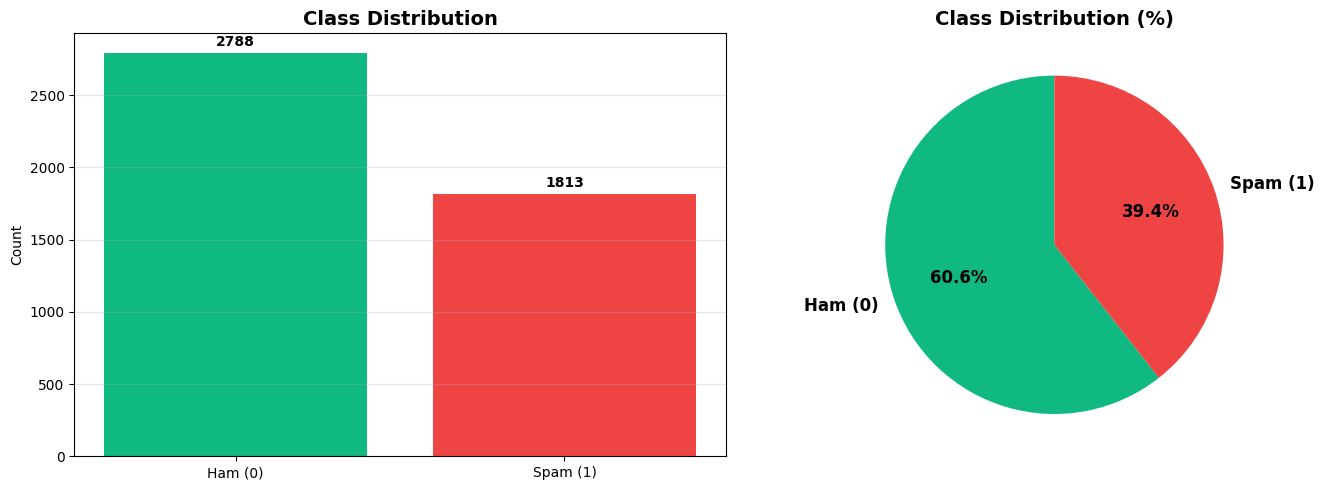

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.023029           0.014917       0.055031      0.001528   
std          0.067259           0.090376       0.098852      0.032589   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.082353      0.000000   
max          1.000000           1.000000       1.000000      1.000000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.031222        0.016310          0.015709            0.009477   
std         0.067251        0.046569          0.053843            0.036100   
min         0.000000        0.

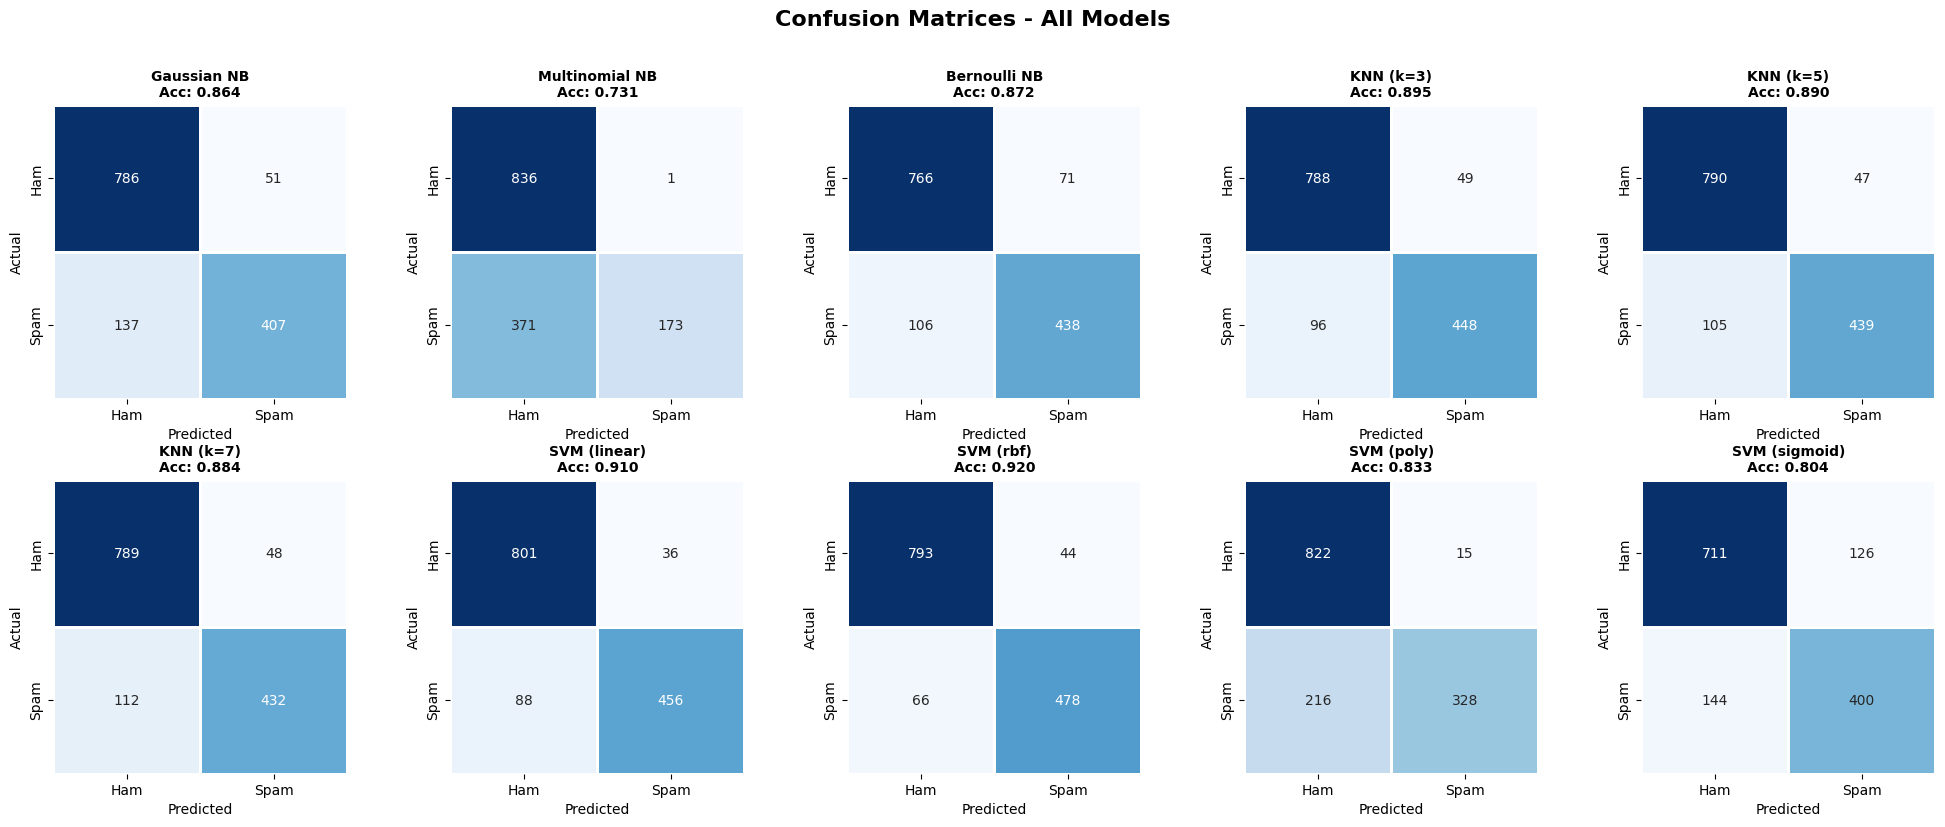

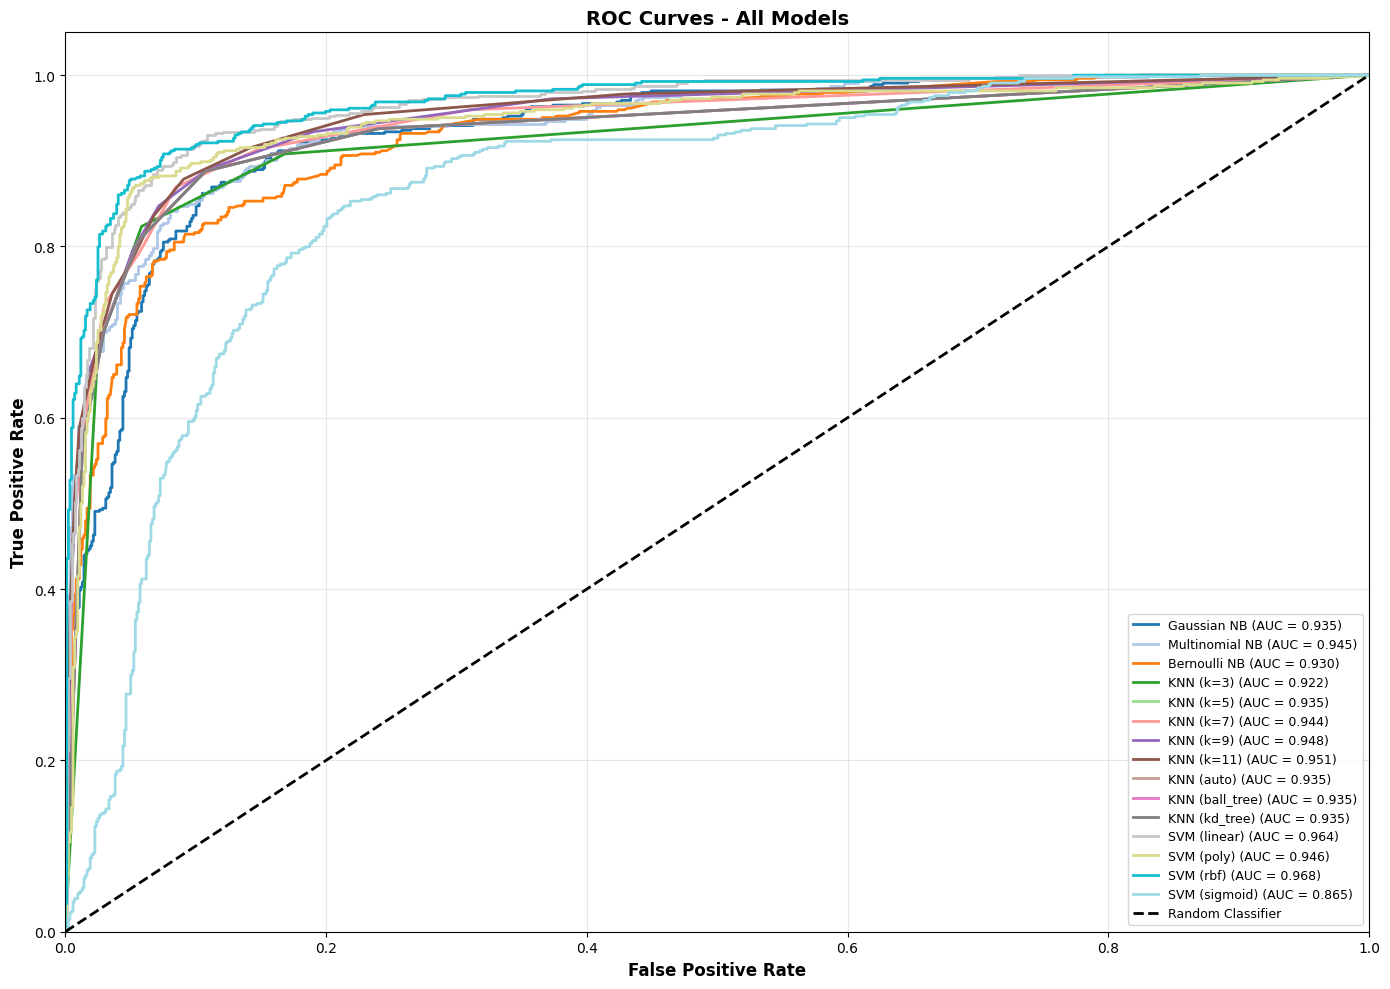

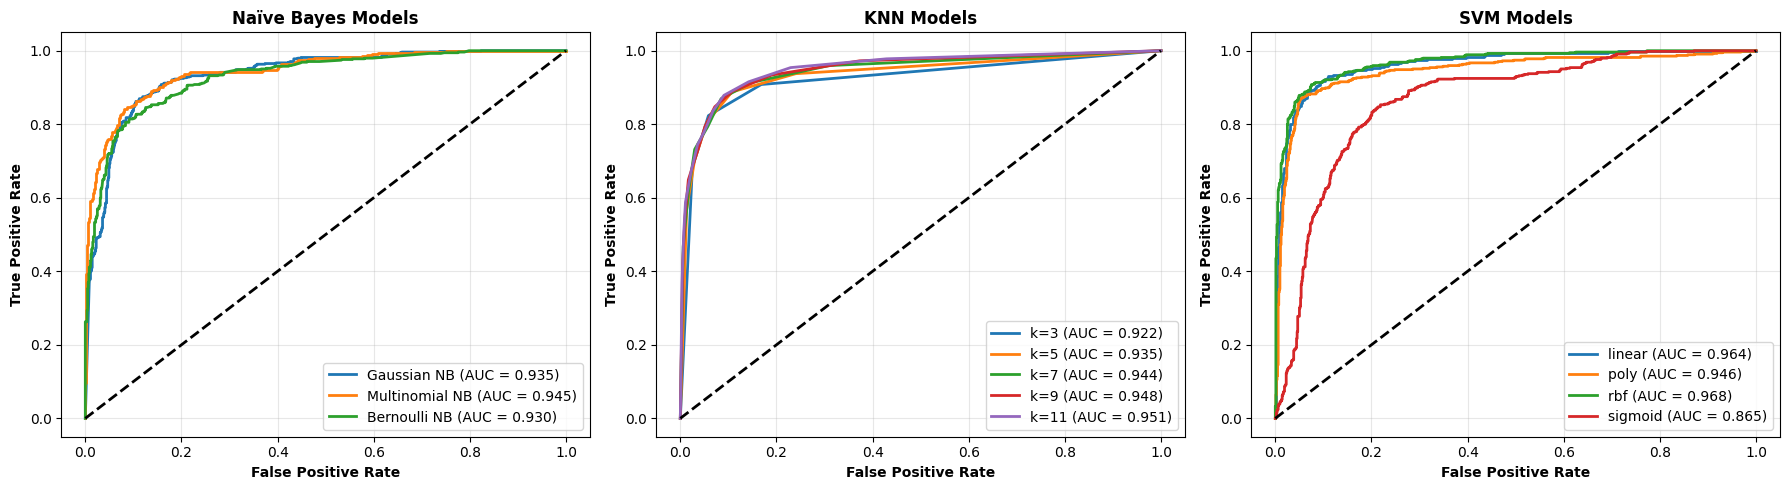

 K-FOLD CROSS VALIDATION (K=5)

Naïve Bayes Models:
----------------------------------------------------------------------
Gaussian NB          - Mean: 0.8615 (+/- 0.0143)
                       Fold Scores: ['0.8804', '0.8540', '0.8385', '0.8649', '0.8696']
Multinomial NB       - Mean: 0.7280 (+/- 0.0247)
                       Fold Scores: ['0.7438', '0.7034', '0.6941', '0.7407', '0.7578']
Bernoulli NB         - Mean: 0.8674 (+/- 0.0110)
                       Fold Scores: ['0.8742', '0.8525', '0.8556', '0.8758', '0.8789']

KNN Models:
----------------------------------------------------------------------
KNN (k=3)            - Mean: 0.8944 (+/- 0.0102)
                       Fold Scores: ['0.9099', '0.8898', '0.8882', '0.8820', '0.9022']
KNN (k=5)            - Mean: 0.8922 (+/- 0.0107)
                       Fold Scores: ['0.9053', '0.9006', '0.8913', '0.8742', '0.8898']
KNN (k=7)            - Mean: 0.8885 (+/- 0.0095)
                       Fold Scores: ['0.9037', '0.8929', '0.8820

In [ ]:
# -*- coding: utf-8 -*-
"""Assignment3.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1AvVVaoZlveuhPYk3M9ekeU8nfmcDe8rS
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Naïve Bayes models
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# KNN models
from sklearn.neighbors import KNeighborsClassifier

# SVM models
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report,
                            roc_curve, auc, roc_auc_score)

# 1. Loading the dataset
df = pd.read_csv("/content/spambase_csv.csv")
print(df.head())

# 2. Preprocessing the data

print("No of Instances : ",df.shape[0])
print()
print("No of Features : ",df.shape[1])
print()
print("Instances :")
for col in df.columns:
    print(col)
print()
print()
print("Number of instances/class : ",df.groupby("class").size())
print()

print("\n--- Data Types ---")
print(df.info())

print("--- Missing Values ---")
print(df.isnull().sum())

print(df.describe())

# Standardization
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'class' in numeric_features:
    numeric_features.remove('class')

# Apply MinMax Scaling
minmax = MinMaxScaler()
df[numeric_features] = minmax.fit_transform(df[numeric_features])

print("--- Data after MinMax Scaling ---")
print(df.head(5))
print()
print(df.describe())
print()

#  EXPLORATORY DATA ANALYSIS (EDA)


print(" EXPLORATORY DATA ANALYSIS")


# Class distribution
class_counts = df['class'].value_counts()
print("\nClass Distribution:")
print(f"Ham (0): {class_counts[0]} ({class_counts[0]/len(df)*100:.2f}%)")
print(f"Spam (1): {class_counts[1]} ({class_counts[1]/len(df)*100:.2f}%)")

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(['Ham (0)', 'Spam (1)'], class_counts.values, color=['#10b981', '#ef4444'])
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Pie chart
colors = ['#10b981', '#ef4444']
axes[1].pie(class_counts.values, labels=['Ham (0)', 'Spam (1)'], autopct='%1.1f%%',
           colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Class Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Feature distributions for top spam indicators
spam_emails = df[df['class'] == 1]
ham_emails = df[df['class'] == 0]

print(df.describe())

X = df.drop('class',axis=1)
Y = df['class']

print(X.head())
print(Y.head())

# FEATURE SELECTION

print("\n" + "="*80)
print("STEP 2.2: FEATURE SELECTION")
print("="*80)

X = df.drop('class', axis=1)
Y = df['class']

print("Original Features:")
print(X.head())
print()
print("Target Variable:")
print(Y.head())
print()

# Feature Selection - ANOVA
selector = SelectKBest(score_func=f_classif, k=20)
X_new = selector.fit_transform(X, Y)
selected_cols = selector.get_support(indices=True)
X_df = pd.DataFrame(X_new, columns=X.columns[selected_cols])

print("Selected Features (Top 20):")
print(X_df.head(20))
print()

# Feature scores
feature_scores = selector.scores_
selected_features = X.columns[selector.get_support()]

print("ANOVA Test:\n")
print("FEATURE SCORES:")
for feat, score in zip(X.columns, feature_scores):
    print(f"  {feat}: {score:.4f}")
print()

print("Selected Features:")
print(selected_features.tolist())
print()

# Update X with selected features
X = X[selected_features]
print(X)

X = X[selected_features]

# SPLITTING THE DATA

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

print(f"Train set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Train class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Data preprocessing completed!")

#  MODEL TRAINING AND EVALUATION
print(" MODEL TRAINING AND EVALUATION")

# Dictionary to store all results
results = {}

def evaluate_model(name, model, X_train_data, X_test_data, y_train, y_test):
    """Train and evaluate model"""
    # Train
    model.fit(X_train_data, y_train)

    # Predict
    y_pred = model.predict(X_test_data)

    # Get probabilities if available
    try:
        y_pred_proba = model.predict_proba(X_test_data)[:, 1]
    except:
        y_pred_proba = None

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results[name] = {
        'model': model,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'confusion_matrix': cm,
        'predictions': y_pred,
        'pred_proba': y_pred_proba
    }

    # Print results
    print(f"\n{name}")
    print("-" * 70)
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    return model, y_pred

#  NAÏVE BAYES MODELS
print(" NAÏVE BAYES MODELS")

# Gaussian Naïve Bayes
print("\n Training Gaussian Naïve Bayes...")
gnb_model = GaussianNB()
gnb_model, gnb_pred = evaluate_model('Gaussian NB', gnb_model, X_train, X_test, y_train, y_test)

# Multinomial Naïve Bayes
print("\n Training Multinomial Naïve Bayes...")
mnb_model = MultinomialNB()
mnb_model, mnb_pred = evaluate_model('Multinomial NB', mnb_model, X_train, X_test, y_train, y_test)

# Bernoulli Naïve Bayes
print("\n Training Bernoulli Naïve Bayes...")
bnb_model = BernoulliNB()
bnb_model, bnb_pred = evaluate_model('Bernoulli NB', bnb_model, X_train, X_test, y_train, y_test)

#  K-NEAREST NEIGHBORS (KNN)
print("K-NEAREST NEIGHBORS (KNN)")

# Test different K values
k_values = [3, 5, 7, 9, 11]

for k in k_values:
    print(f"\n[KNN with k={k}] Training...")
    knn_model = KNeighborsClassifier(n_neighbors=k, algorithm='auto')
    knn_model, knn_pred = evaluate_model(f'KNN (k={k})', knn_model, X_train_scaled, X_test_scaled, y_train, y_test)

# Test different algorithms with k=5
print("\n" + "-"*70)
print("Testing different KNN algorithms (k=5):")
print("-"*70)

algorithms = ['auto', 'ball_tree', 'kd_tree']

for algo in algorithms:
    print(f"\n[KNN - {algo}] Training...")
    knn_model = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    knn_model, knn_pred = evaluate_model(f'KNN ({algo})', knn_model, X_train_scaled, X_test_scaled, y_train, y_test)

#  SUPPORT VECTOR MACHINE (SVM)

print("SUPPORT VECTOR MACHINE (SVM)")

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    print(f"\n[SVM - {kernel} kernel] Training...")
    if kernel == 'poly':
        svm_model = SVC(kernel=kernel, degree=3, probability=True, random_state=42)
    else:
        svm_model = SVC(kernel=kernel, probability=True, random_state=42)

    svm_model, svm_pred = evaluate_model(f'SVM ({kernel})', svm_model, X_train_scaled, X_test_scaled, y_train, y_test)

#  CONFUSION MATRICES VISUALIZATION
print("CONFUSION MATRICES")


#  key models for visualization
key_models = [
    'Gaussian NB', 'Multinomial NB', 'Bernoulli NB',
    'KNN (k=3)', 'KNN (k=5)', 'KNN (k=7)',
    'SVM (linear)', 'SVM (rbf)', 'SVM (poly)', 'SVM (sigmoid)'
]

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for idx, model_name in enumerate(key_models):
    if model_name in results:
        cm = results[model_name]['confusion_matrix']
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                   cbar=False, square=True, linewidths=1,
                   xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
        axes[idx].set_title(f'{model_name}\nAcc: {results[model_name]["accuracy"]:.3f}',
                           fontweight='bold', fontsize=10)
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('Actual')

plt.suptitle('Confusion Matrices - All Models', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

#  ROC CURVES

# Plot ROC curves for all models
plt.figure(figsize=(14, 10))

colors = plt.cm.tab20(np.linspace(0, 1, len(results)))

for idx, (model_name, result) in enumerate(results.items()):
    if result['pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['pred_proba'])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})',
                linewidth=2, color=colors[idx])

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=9)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Separate ROC curves by model type
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Naïve Bayes
for model_name in ['Gaussian NB', 'Multinomial NB', 'Bernoulli NB']:
    if model_name in results and results[model_name]['pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, results[model_name]['pred_proba'])
        roc_auc = auc(fpr, tpr)
        axes[0].plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})', linewidth=2)

axes[0].plot([0, 1], [0, 1], 'k--', linewidth=2)
axes[0].set_xlabel('False Positive Rate', fontweight='bold')
axes[0].set_ylabel('True Positive Rate', fontweight='bold')
axes[0].set_title('Naïve Bayes Models', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# KNN
for k in [3, 5, 7, 9, 11]:
    model_name = f'KNN (k={k})'
    if model_name in results and results[model_name]['pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, results[model_name]['pred_proba'])
        roc_auc = auc(fpr, tpr)
        axes[1].plot(fpr, tpr, label=f'k={k} (AUC = {roc_auc:.3f})', linewidth=2)

axes[1].plot([0, 1], [0, 1], 'k--', linewidth=2)
axes[1].set_xlabel('False Positive Rate', fontweight='bold')
axes[1].set_ylabel('True Positive Rate', fontweight='bold')
axes[1].set_title('KNN Models', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# SVM
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model_name = f'SVM ({kernel})'
    if model_name in results and results[model_name]['pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, results[model_name]['pred_proba'])
        roc_auc = auc(fpr, tpr)
        axes[2].plot(fpr, tpr, label=f'{kernel} (AUC = {roc_auc:.3f})', linewidth=2)

axes[2].plot([0, 1], [0, 1], 'k--', linewidth=2)
axes[2].set_xlabel('False Positive Rate', fontweight='bold')
axes[2].set_ylabel('True Positive Rate', fontweight='bold')
axes[2].set_title('SVM Models', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

#  K-FOLD CROSS VALIDATION (K=5)

print(" K-FOLD CROSS VALIDATION (K=5)")

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

# Naïve Bayes
print("\nNaïve Bayes Models:")
print("-" * 70)
for name, model_class in [('Gaussian NB', GaussianNB()),
                          ('Multinomial NB', MultinomialNB()),
                          ('Bernoulli NB', BernoulliNB())]:
    scores = cross_val_score(model_class, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name:20s} - Mean: {scores.mean():.4f} (+/- {scores.std():.4f})")
    print(f"{'':20s}   Fold Scores: {[f'{s:.4f}' for s in scores]}")

# KNN
print("\nKNN Models:")
print("-" * 70)
for k in [3, 5, 7, 9, 11]:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    name = f'KNN (k={k})'
    cv_results[name] = scores
    print(f"{name:20s} - Mean: {scores.mean():.4f} (+/- {scores.std():.4f})")
    print(f"{'':20s}   Fold Scores: {[f'{s:.4f}' for s in scores]}")

# SVM
print("\nSVM Models:")
print("-" * 70)
for kernel in ['linear', 'rbf', 'poly', 'sigmoid']:
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=3, random_state=42)
    else:
        model = SVC(kernel=kernel, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    name = f'SVM ({kernel})'
    cv_results[name] = scores
    print(f"{name:20s} - Mean: {scores.mean():.4f} (+/- {scores.std():.4f})")
    print(f"{'':20s}   Fold Scores: {[f'{s:.4f}' for s in scores]}")

# Visualize cross-validation results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Naïve Bayes
nb_models = ['Gaussian NB', 'Multinomial NB', 'Bernoulli NB']
nb_scores = [cv_results[m] for m in nb_models]
bp1 = axes[0].boxplot(nb_scores, labels=nb_models, patch_artist=True)
for patch in bp1['boxes']:
    patch.set_facecolor('#3b82f6')
axes[0].set_title('Naïve Bayes - 5-Fold CV', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=15)

# KNN
knn_models = [f'KNN (k={k})' for k in [3, 5, 7, 9, 11]]
knn_scores = [cv_results[m] for m in knn_models]
bp2 = axes[1].boxplot(knn_scores, labels=[f'k={k}' for k in [3, 5, 7, 9, 11]],
                       patch_artist=True)
for patch in bp2['boxes']:
    patch.set_facecolor('#10b981')
axes[1].set_title('KNN - 5-Fold CV', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# SVM
svm_models = [f'SVM ({k})' for k in ['linear', 'rbf', 'poly', 'sigmoid']]
svm_scores = [cv_results[m] for m in svm_models]
bp3 = axes[2].boxplot(svm_scores, labels=['linear', 'rbf', 'poly', 'sigmoid'],
                       patch_artist=True)
for patch in bp3['boxes']:
    patch.set_facecolor('#f59e0b')
axes[2].set_title('SVM - 5-Fold CV', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Accuracy', fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)
axes[2].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

# COMPREHENSIVE MODEL COMPARISON

# Create comparison dataframe
comparison_data = []
for model_name, result in results.items():
    comparison_data.append({
        'Model': model_name,
        'Accuracy': result['accuracy'],
        'Precision': result['precision'],
        'Recall': result['recall'],
        'F1-Score': result['f1_score']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('F1-Score', ascending=False)

print("\nTest Set Performance (sorted by F1-Score):")
print("=" * 80)
print(comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors_map = {'Accuracy': '#3b82f6', 'Precision': '#10b981',
              'Recall': '#f59e0b', 'F1-Score': '#ef4444'}

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    top_10 = comparison_df.nlargest(10, metric)

    bars = ax.barh(range(len(top_10)), top_10[metric].values, color=colors_map[metric])
    ax.set_yticks(range(len(top_10)))
    ax.set_yticklabels(top_10['Model'].values)
    ax.set_xlabel(metric, fontweight='bold')
    ax.set_title(f'Top 10 Models by {metric}', fontsize=12, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    ax.invert_yaxis()

    # Add value labels
    for i, (bar, val) in enumerate(zip(bars, top_10[metric].values)):
        ax.text(val + 0.01, i, f'{val:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Model type comparison
model_types = {
    'Naïve Bayes': [m for m in results.keys() if 'NB' in m],
    'KNN': [m for m in results.keys() if 'KNN' in m and 'k=' in m],
    'SVM': [m for m in results.keys() if 'SVM' in m]
}

type_comparison = []
for model_type, models in model_types.items():
    if models:
        type_metrics = {
            'Accuracy': np.mean([results[m]['accuracy'] for m in models]),
            'Precision': np.mean([results[m]['precision'] for m in models]),
            'Recall': np.mean([results[m]['recall'] for m in models]),
            'F1-Score': np.mean([results[m]['f1_score'] for m in models])
        }
        type_comparison.append({'Model Type': model_type, **type_metrics})

type_df = pd.DataFrame(type_comparison)

print("\n" + "=" * 80)
print("Average Performance by Model Type:")
print("=" * 80)
print(type_df.to_string(index=False))

# Radar chart for model type comparison
from math import pi

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

colors_radar = ['#3b82f6', '#10b981', '#f59e0b']

for idx, row in type_df.iterrows():
    values = [row[m] for m in metrics]
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=row['Model Type'], color=colors_radar[idx])
    ax.fill(angles, values, alpha=0.15, color=colors_radar[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontweight='bold')
ax.set_ylim(0, 1)
ax.set_title('Model Type Comparison - All Metrics', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.show()

#  FINAL OBSERVATIONS AND RECOMMENDATIONS

best_model = comparison_df.iloc[0]
print(f"\n BEST OVERALL MODEL: {best_model['Model']}")
print("-" * 80)
print(f"   Accuracy:  {best_model['Accuracy']:.4f}")
print(f"   Precision: {best_model['Precision']:.4f}")
print(f"   Recall:    {best_model['Recall']:.4f}")
print(f"   F1-Score:  {best_model['F1-Score']:.4f}")

print("\n KEY OBSERVATIONS:")
print("-" * 80)

# Best in each category
for metric in metrics:
    best = comparison_df.nlargest(1, metric).iloc[0]
    print(f"   Best {metric:12s}: {best['Model']:25s} ({best[metric]:.4f})")